  # Problem statement
## Based on the given features predict whether the person will donate blood or not

In [1]:
# importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading dataset
data=pd.read_csv("Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv")
data

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


In [3]:
data.drop("Unnamed: 0",axis=1,inplace=True) # removing unwanted features

# basic checks

In [4]:
data.shape ## Finding the shape of dataset

(576, 5)

In [5]:
data.head() # display initial 5 rows

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [6]:
data.tail() # display final 5 rows

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,23,1,250,23,0
572,16,3,750,86,0
573,21,2,500,52,0
574,39,1,250,39,0
575,72,1,250,72,0


In [7]:
data.describe() ## Statistical information about numerical data

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [8]:
data.info() ## Quick summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Months since Last Donation   576 non-null    int64
 1   Number of Donations          576 non-null    int64
 2   Total Volume Donated (c.c.)  576 non-null    int64
 3   Months since First Donation  576 non-null    int64
 4   Made Donation in March 2007  576 non-null    int64
dtypes: int64(5)
memory usage: 22.6 KB


In [9]:
data.duplicated().sum() #checking duplicate records

153

In [10]:
# dropping duplicate records
data.drop_duplicates(inplace=True)

# EDA

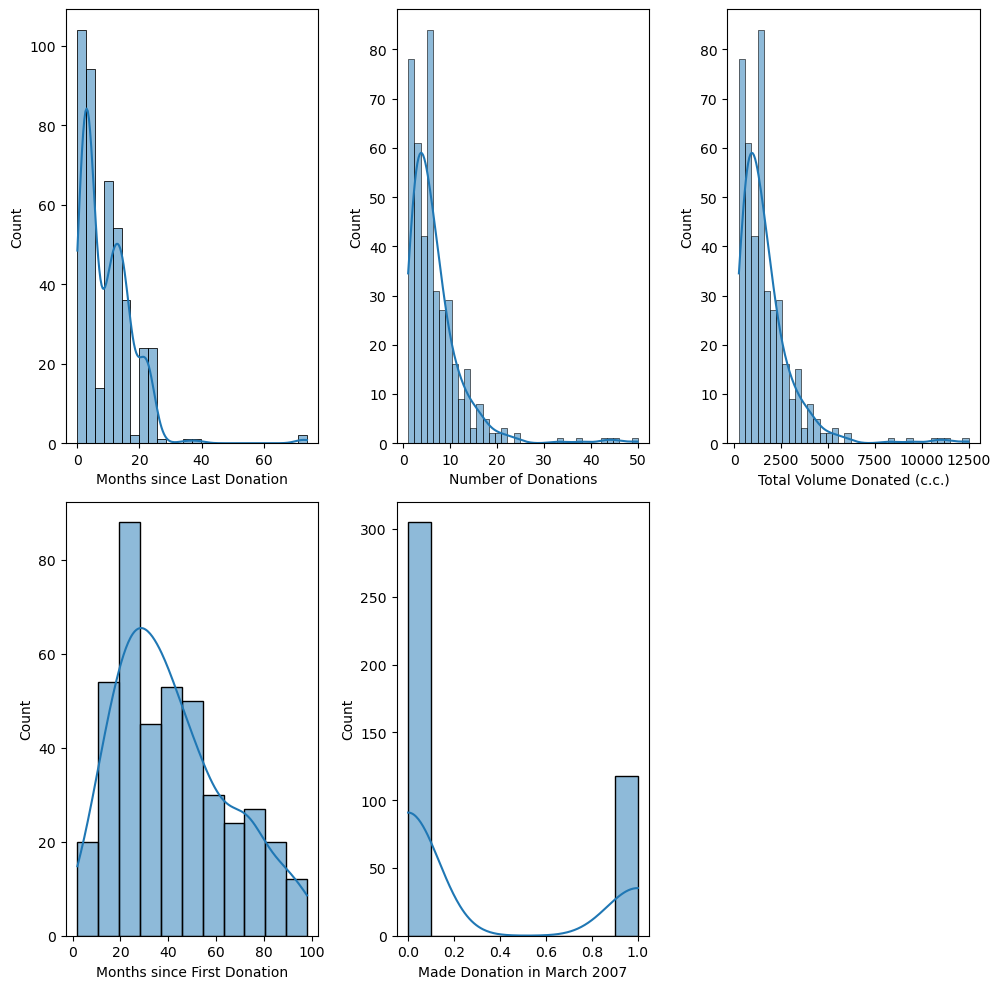

In [11]:
# Univariate Analysis
plt.figure(figsize=(10,10))
plotnumber=1
for i in data:
    plt.subplot(2,3,plotnumber)
    sns.histplot(x=data[i],kde=True)
    plotnumber+=1
plt.tight_layout()  

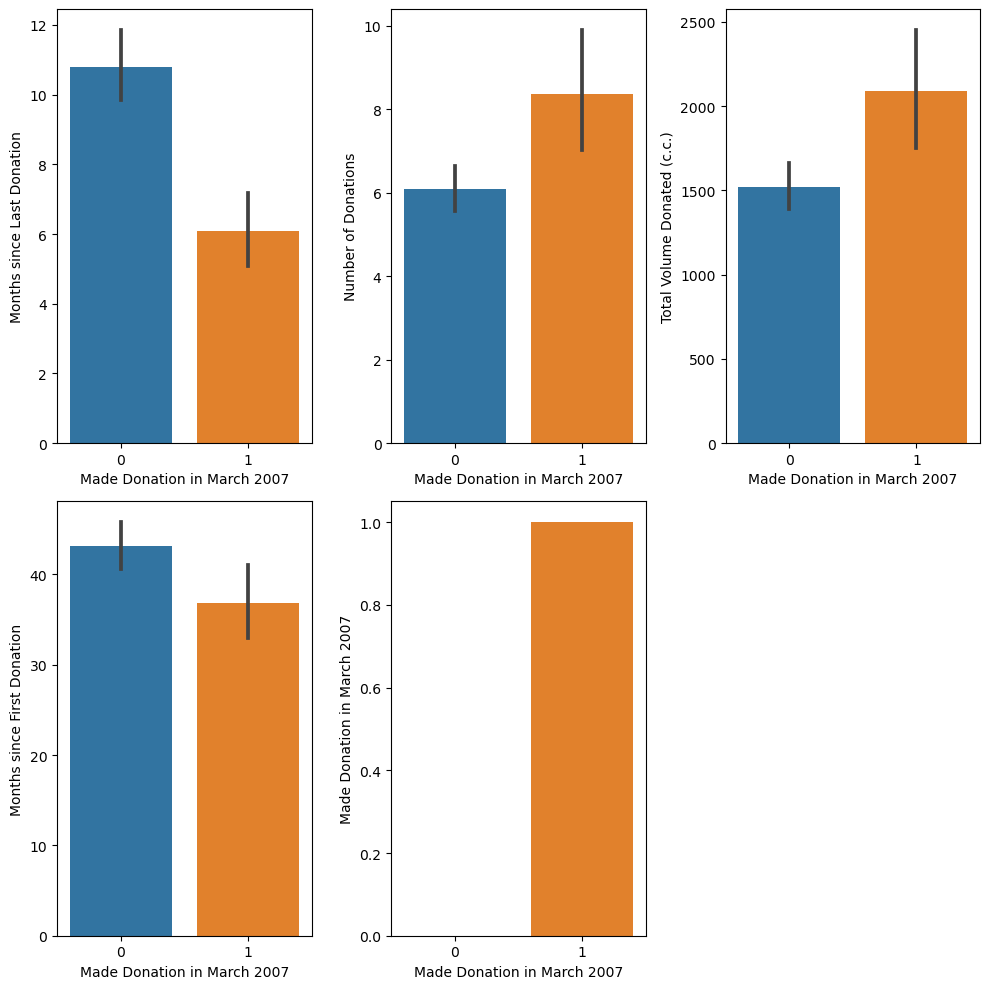

In [12]:
# bivariate Analysis
plt.figure(figsize=(10,10))
plotnumber=1
for i in data:
    plt.subplot(2,3,plotnumber)
    sns.barplot(x=data["Made Donation in March 2007"],y=data[i])
    plotnumber+=1
plt.tight_layout() 

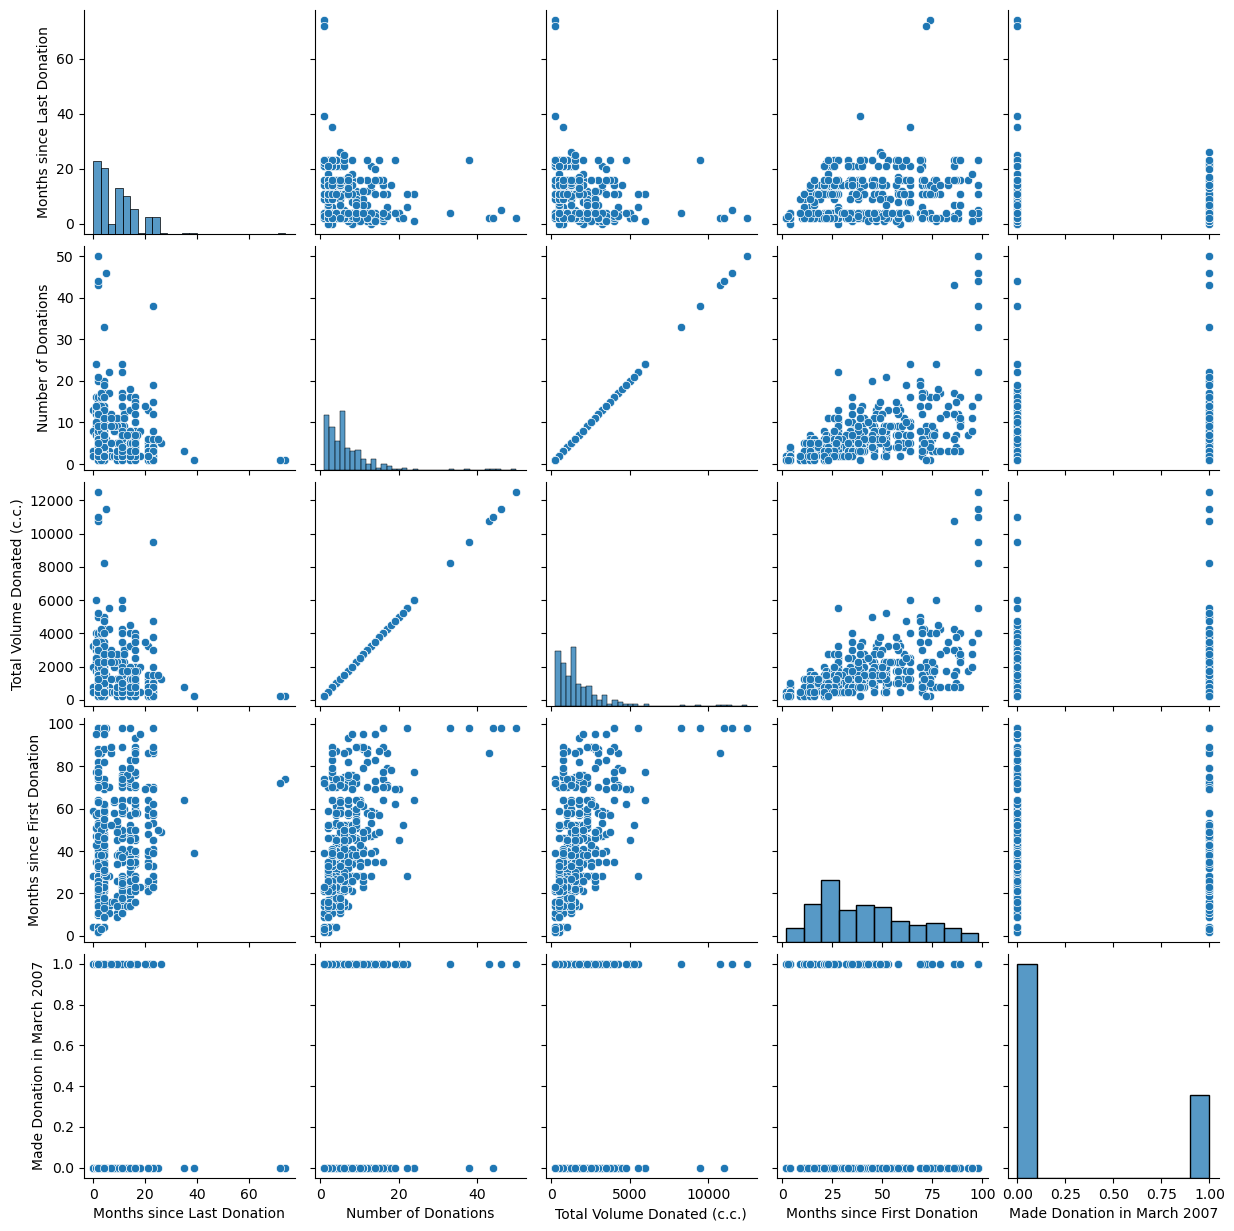

In [13]:
sns.pairplot(data)

# data preprocessing
# checking for null values

In [14]:
data.isnull().sum() # checking for null values

Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

In [15]:
# no null values

# handling outliers

In [16]:
# outliers using boxplot

<AxesSubplot:>

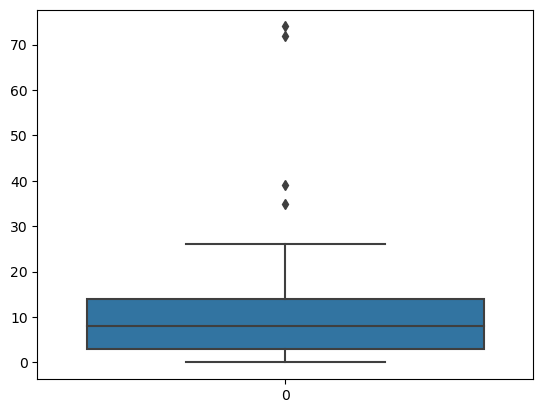

In [17]:
sns.boxplot(data['Months since Last Donation'])

In [18]:
## using IQR to remove the outliers
IQR=stats.iqr(data["Months since Last Donation"],interpolation="midpoint")

## min and max limit calculation

# First quartile (Q1) 
Q1=data["Months since Last Donation"].quantile(0.25)

# Third quartile (Q3) 
Q3=data["Months since Last Donation"].quantile(0.75)

##getting the limits
lower_limit=Q1-1.5*IQR 
upper_limit=Q3+1.5*IQR 

# replacing with median
data.loc[data["Months since Last Donation"]>upper_limit,"Months since Last Donation"]=np.median(data["Months since Last Donation"])

<AxesSubplot:>

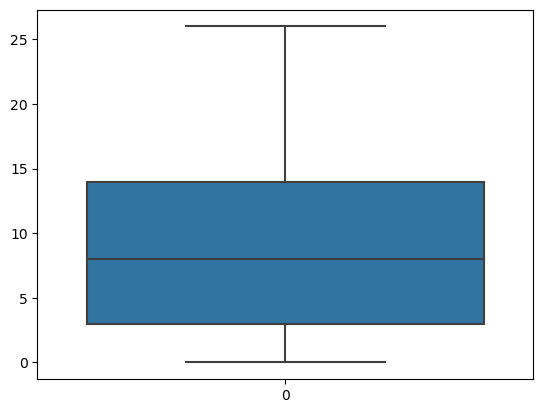

In [19]:
sns.boxplot(data['Months since Last Donation'])

<AxesSubplot:>

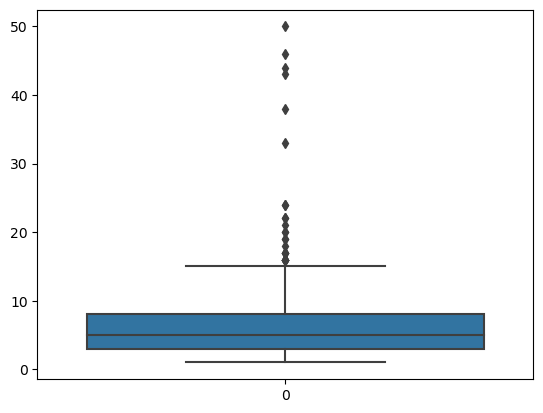

In [20]:
sns.boxplot(data['Number of Donations'])

In [21]:
IQR=stats.iqr(data['Number of Donations'],interpolation="midpoint")
Q1=data['Number of Donations'].quantile(0.25)
Q3=data['Number of Donations'].quantile(0.75)
lower_limit=Q1-1.5*IQR 
upper_limit=Q3+1.5*IQR 
data.loc[data['Number of Donations']>upper_limit,'Number of Donations']=np.median(data['Number of Donations'])

<AxesSubplot:>

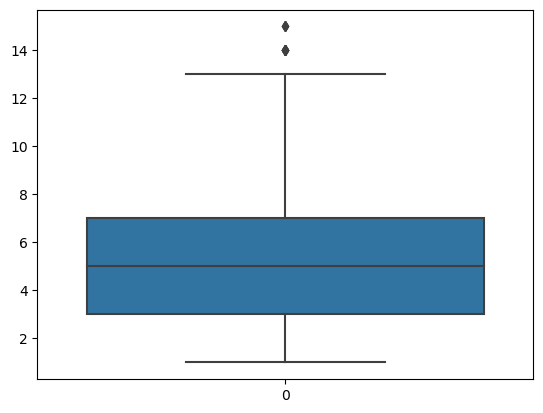

In [22]:
sns.boxplot(data['Number of Donations'])

<AxesSubplot:>

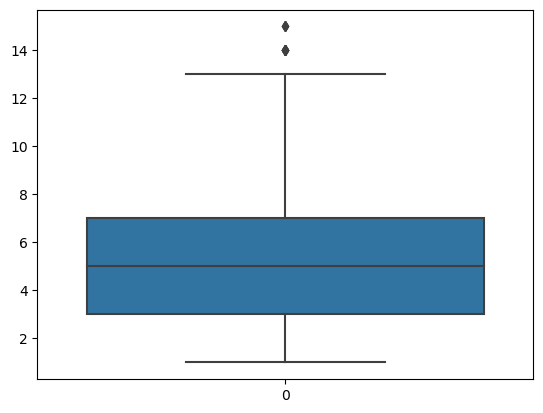

In [23]:
sns.boxplot(data['Number of Donations'])

<AxesSubplot:>

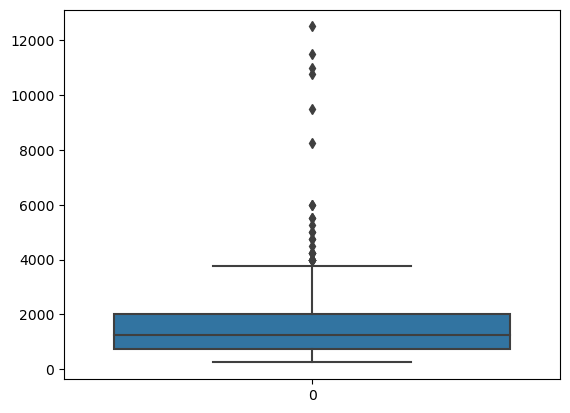

In [24]:
sns.boxplot(data['Total Volume Donated (c.c.)'])

In [25]:
IQR=stats.iqr(data['Total Volume Donated (c.c.)'],interpolation="midpoint")
Q1=data['Total Volume Donated (c.c.)'].quantile(0.25)
Q3=data['Total Volume Donated (c.c.)'].quantile(0.75)
lower_limit=Q1-1.5*IQR 
upper_limit=Q3+1.5*IQR 
data.loc[data['Total Volume Donated (c.c.)']>upper_limit,'Total Volume Donated (c.c.)']=np.median(data['Total Volume Donated (c.c.)'])

<AxesSubplot:>

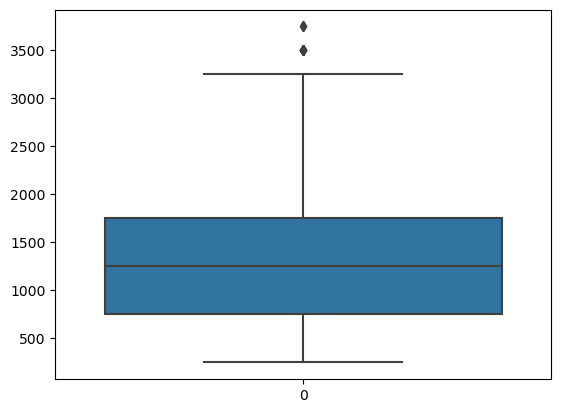

In [26]:
sns.boxplot(data['Total Volume Donated (c.c.)'])

<AxesSubplot:>

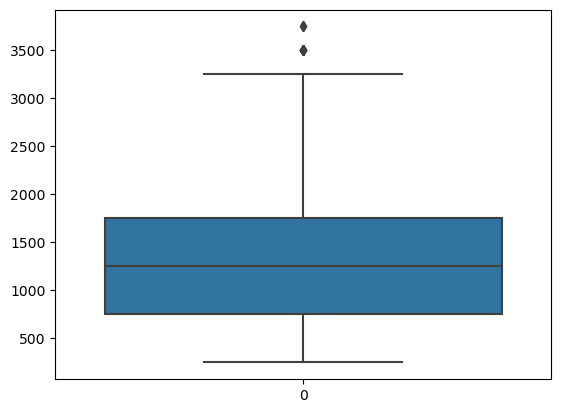

In [27]:
sns.boxplot(data['Total Volume Donated (c.c.)'])

<AxesSubplot:>

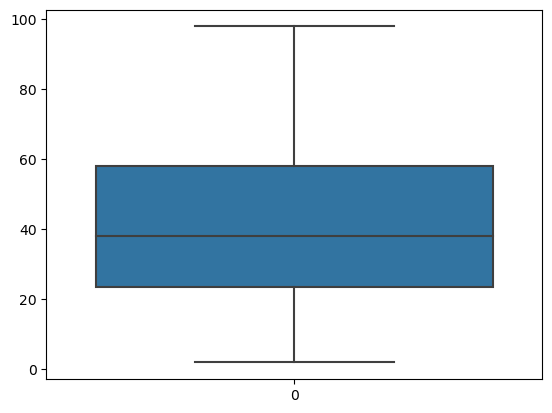

In [28]:
sns.boxplot(data['Months since First Donation'])

<AxesSubplot:>

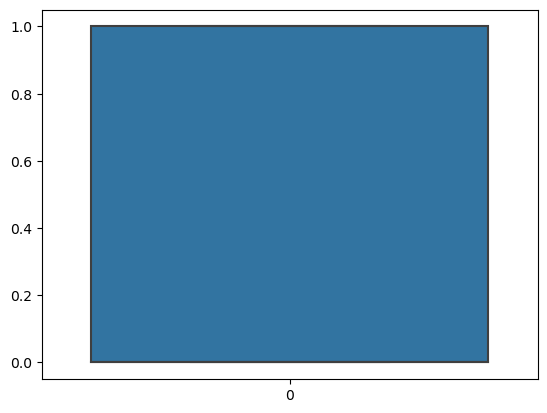

In [29]:
sns.boxplot(data['Made Donation in March 2007'])

In [30]:
# feature selection using heatmap

<AxesSubplot:>

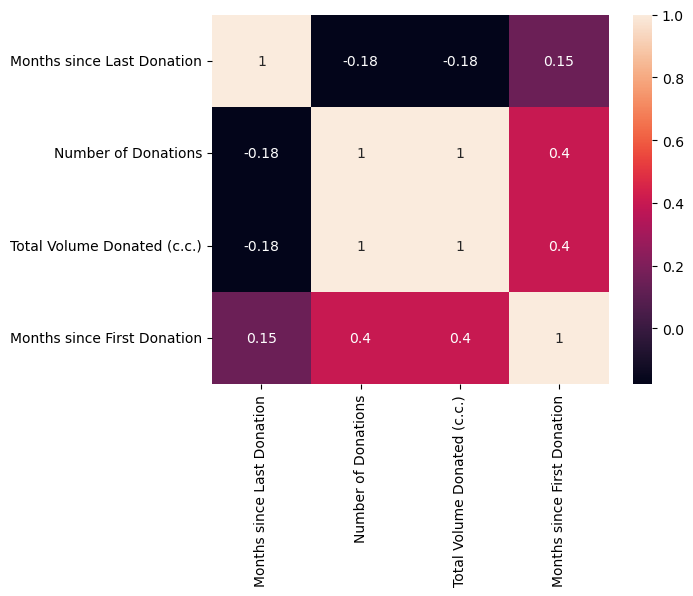

In [31]:
sns.heatmap(data.drop("Made Donation in March 2007",axis=1).corr(),annot=True)

In [32]:
data.drop("Total Volume Donated (c.c.)",axis=1,inplace=True) # dropping highly correlated column

<AxesSubplot:>

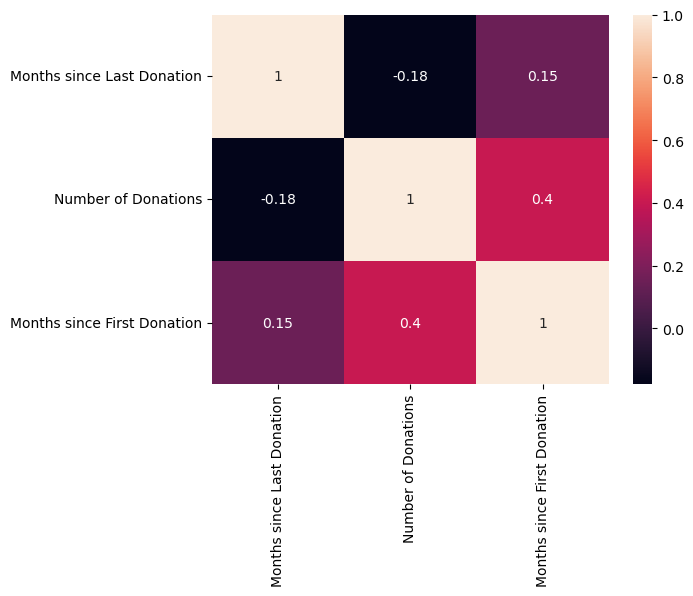

In [33]:
sns.heatmap(data.drop("Made Donation in March 2007",axis=1).corr(),annot=True)

In [34]:
## Creating independent and dependent variable
x=data.drop("Made Donation in March 2007",axis=1)
x

,Months since Last Donation,Number of Donations,Months since First Donation
0,2,5,98
1,0,13,28
2,1,5,35
3,2,5,45
4,1,5,77
...,...,...,...
566,23,1,23
572,16,3,86
573,21,2,52
574,8,1,39


In [35]:
y=data["Made Donation in March 2007"]
y

0      1
1      1
2      1
3      1
4      0
      ..
566    1
572    0
573    0
574    0
575    0
Name: Made Donation in March 2007, Length: 423, dtype: int64

In [36]:
# scaling using MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [37]:
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.03030009, -0.15215152,  2.41970857],
       [-1.32308943,  2.33519502, -0.57546599],
       [-1.17669476, -0.15215152, -0.27594854],
       ...,
       [ 1.75119867, -1.08490647,  0.451451  ],
       [-0.15193206, -1.39582479, -0.10479571],
       [-0.15193206, -1.39582479,  1.30721516]])

In [38]:
x_final=pd.DataFrame(x_scaled,columns=x.columns)
x_final

,Months since Last Donation,Number of Donations,Months since First Donation
0,-1.030300,-0.152152,2.419709
1,-1.323089,2.335195,-0.575466
2,-1.176695,-0.152152,-0.275949
3,-1.030300,-0.152152,0.151934
4,-1.176695,-0.152152,1.521156
...,...,...,...
418,2.043988,-1.395825,-0.789407
419,1.019225,-0.773988,1.906250
420,1.751199,-1.084906,0.451451
421,-0.151932,-1.395825,-0.104796


In [39]:
#Splitting the data into train set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_final,y,random_state=10,test_size=0.30)

In [40]:
# balancing 
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [41]:
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [42]:
from collections import Counter
print(Counter(y_train))

Counter({0: 210, 1: 86})


In [43]:
print(Counter(y_sm))

Counter({1: 210, 0: 210})


# Model building

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_sm,y_sm)

LogisticRegression()

In [45]:
y_pred=LR.predict(x_test)  # for testing data
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score


In [47]:
acc=accuracy_score(y_test,y_pred)
acc

0.6299212598425197

In [48]:
f1_value=f1_score(y_test,y_pred)
f1_value

0.49462365591397844

In [49]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[57 38]
 [ 9 23]]
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        95
           1       0.38      0.72      0.49        32

    accuracy                           0.63       127
   macro avg       0.62      0.66      0.60       127
weighted avg       0.74      0.63      0.65       127



In [50]:
y_pred_train=LR.predict(x_sm)
acc_train=accuracy_score(y_sm,y_pred_train)
acc_train

0.6142857142857143

In [51]:
print(classification_report(y_sm,y_pred_train)) # for training data

              precision    recall  f1-score   support

           0       0.62      0.58      0.60       210
           1       0.61      0.65      0.63       210

    accuracy                           0.61       420
   macro avg       0.61      0.61      0.61       420
weighted avg       0.61      0.61      0.61       420



In [52]:
print(acc_train)
print(acc)

0.6142857142857143
0.6299212598425197


In [53]:
from sklearn.model_selection import cross_val_score

cross_val=cross_val_score(LR,x_sm,y_sm,cv=3,scoring="f1")
cross=cross_val.mean()
cross

0.6329384343553515

In [54]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import metrics

In [55]:
roc_score=metrics.roc_auc_score(y_test,y_pred)
roc_score

0.659375

# KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()

In [57]:
error_rate=[]
for i in range(1,20):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_sm, y_sm)
    y_pred_knn=model.predict(x_test)
    error_rate.append(np.mean(y_pred_knn!=y_test))

In [58]:
error_rate

[0.3700787401574803,
 0.28346456692913385,
 0.33070866141732286,
 0.2992125984251969,
 0.31496062992125984,
 0.2992125984251969,
 0.3228346456692913,
 0.28346456692913385,
 0.2992125984251969,
 0.2440944881889764,
 0.28346456692913385,
 0.25984251968503935,
 0.2755905511811024,
 0.25984251968503935,
 0.31496062992125984,
 0.28346456692913385,
 0.31496062992125984,
 0.29133858267716534,
 0.3228346456692913]

Text(0, 0.5, 'error_rate')

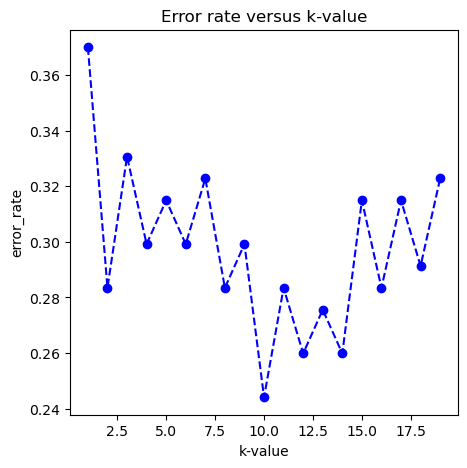

In [59]:
plt.figure(figsize=(5,5))
plt.plot(range(1,20), error_rate, color='blue', linestyle='--', marker='o', markersize=6)
plt.title("Error rate versus k-value")
plt.xlabel('k-value')
plt.ylabel('error_rate')

In [60]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x_sm,y_sm)

KNeighborsClassifier(n_neighbors=12)

In [61]:
y_pred1=knn.predict(x_test)
y_pred1

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [62]:
acc1=accuracy_score(y_test,y_pred1)
acc1


0.7401574803149606

In [63]:
f1_value1=f1_score(y_test,y_pred1)
f1_value1

0.5217391304347827

In [64]:
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[76 19]
 [14 18]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        95
           1       0.49      0.56      0.52        32

    accuracy                           0.74       127
   macro avg       0.67      0.68      0.67       127
weighted avg       0.75      0.74      0.75       127



In [65]:
y_pred_train1=knn.predict(x_sm)

In [66]:
acc_train1=accuracy_score(y_sm,y_pred_train1)
acc_train1

0.7357142857142858

In [67]:
cross_val1=cross_val_score(knn,x_sm,y_sm,cv=3,scoring="f1")
cross1=cross_val1.mean()
cross1


0.6925318424243136

In [68]:
roc_score1=metrics.roc_auc_score(y_test,y_pred1)
roc_score1

0.68125

# SVM

In [69]:
from sklearn.svm import SVC
sv=SVC()

In [70]:
sv.fit(x_sm,y_sm)

SVC()

In [71]:
y_pred2=sv.predict(x_test) # for testing data
y_pred2

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [72]:
acc2=accuracy_score(y_test,y_pred2) 
acc2

0.7244094488188977

In [73]:
f1_value2=f1_score(y_test,y_pred2)
f1_value2

0.4927536231884059

In [74]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[75 20]
 [15 17]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        95
           1       0.46      0.53      0.49        32

    accuracy                           0.72       127
   macro avg       0.65      0.66      0.65       127
weighted avg       0.74      0.72      0.73       127



In [75]:
y_pred_train2=sv.predict(x_sm) # for training data
y_pred_train2

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [76]:
acc_train2=accuracy_score(y_sm,y_pred_train2) # for testing data
acc_train2

0.7166666666666667

In [77]:
print(acc_train2)
print(acc2)

0.7166666666666667
0.7244094488188977


In [78]:
cross_val2=cross_val_score(sv,x_sm,y_sm,cv=3,scoring="f1")
cross2=cross_val2.mean()
cross2

0.6788598191214469

In [79]:
roc_score2=metrics.roc_auc_score(y_test,y_pred2)
roc_score2

0.6603618421052632

# Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_sm,y_sm)

DecisionTreeClassifier()

In [81]:
y_pred3=dt.predict(x_test)

In [82]:
acc3=accuracy_score(y_test,y_pred3) # for testing data
acc3

0.6062992125984252

In [83]:
f1_value3=f1_score(y_test,y_pred3)
f1_value3

0.2857142857142857

In [84]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[57 38]
 [ 9 23]]
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        95
           1       0.38      0.72      0.49        32

    accuracy                           0.63       127
   macro avg       0.62      0.66      0.60       127
weighted avg       0.74      0.63      0.65       127



In [85]:
y_pred_train3=dt.predict(x_sm)

In [86]:
acc_train3=accuracy_score(y_sm,y_pred_train3) # for training data
acc_train3

0.969047619047619

In [87]:
print(acc_train3)
print(acc3)

0.969047619047619
0.6062992125984252


In [88]:
cross_val3=cross_val_score(dt,x_sm,y_sm,cv=3,scoring="f1")
cross3=cross_val3.mean()
cross3

0.6918171344586805

In [89]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        95
           1       0.26      0.31      0.29        32

    accuracy                           0.61       127
   macro avg       0.51      0.51      0.51       127
weighted avg       0.63      0.61      0.62       127



In [90]:
print(classification_report(y_sm,y_pred_train3))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       210
           1       1.00      0.94      0.97       210

    accuracy                           0.97       420
   macro avg       0.97      0.97      0.97       420
weighted avg       0.97      0.97      0.97       420



In [91]:
roc_score3=metrics.roc_auc_score(y_test,y_pred3)
roc_score3

0.5088815789473684

# Randonm forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_sm,y_sm)

RandomForestClassifier()

In [93]:
y_pred4=rf.predict(x_test)

In [94]:
acc4=accuracy_score(y_test,y_pred4)
acc4

0.6929133858267716

In [95]:
f1_value4=f1_score(y_test,y_pred4)
f1_value4

0.3389830508474576

In [96]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[57 38]
 [ 9 23]]
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        95
           1       0.38      0.72      0.49        32

    accuracy                           0.63       127
   macro avg       0.62      0.66      0.60       127
weighted avg       0.74      0.63      0.65       127



In [97]:
y_pred_train4=rf.predict(x_sm)


In [98]:
acc_train4=accuracy_score(y_sm,y_pred_train4)
acc_train4

0.969047619047619

In [99]:
print(acc_train4)
print(acc4)

0.969047619047619
0.6929133858267716


In [100]:
cross_val4=cross_val_score(rf,x_sm,y_sm,cv=3,scoring="f1")
cross4=cross_val4.mean()
cross4

0.7501525054466232

In [101]:
roc_score4=metrics.roc_auc_score(y_test,y_pred4)
roc_score4

0.5667763157894737

# Gradient Boosting

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_sm,y_sm)

GradientBoostingClassifier()

In [103]:
y_pred5=gb.predict(x_test)

In [104]:
acc5=accuracy_score(y_test,y_pred5)
acc5

0.7086614173228346

In [105]:
f1_value5=f1_score(y_test,y_pred5)
f1_value5

0.43076923076923074

In [106]:
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[76 19]
 [18 14]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        95
           1       0.42      0.44      0.43        32

    accuracy                           0.71       127
   macro avg       0.62      0.62      0.62       127
weighted avg       0.71      0.71      0.71       127



In [107]:
y_pred_train5=gb.predict(x_sm)

In [108]:
acc_train5=accuracy_score(y_sm,y_pred_train5)
acc_train5

0.8809523809523809

In [109]:
print(acc_train5)
print(acc5)

0.8809523809523809
0.7086614173228346


In [110]:
cross_val5=cross_val_score(gb,x_sm,y_sm,cv=3,scoring="f1")
cross5=cross_val5.mean()
cross5

0.7271599838889985

In [111]:
roc_score5=metrics.roc_auc_score(y_test,y_pred5)
roc_score5

0.61875

# Xg boost

In [112]:
from xgboost import XGBClassifier
xg=XGBClassifier()


In [113]:
xg.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [114]:
y_pred6=xg.predict(x_test)

In [115]:
acc6=accuracy_score(y_test,y_pred6)
acc6

0.6535433070866141

In [116]:
f1_value6=f1_score(y_test,y_pred6)
f1_value6

0.26666666666666666

In [117]:
print(confusion_matrix(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[75 20]
 [24  8]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        95
           1       0.29      0.25      0.27        32

    accuracy                           0.65       127
   macro avg       0.52      0.52      0.52       127
weighted avg       0.64      0.65      0.65       127



In [118]:
y_pred_train6=xg.predict(x_sm)

In [119]:
acc_train6=accuracy_score(y_sm,y_pred_train6)
acc_train6

0.969047619047619

In [120]:
print(acc_train6)
print(acc6)

0.969047619047619
0.6535433070866141


In [121]:
cross_val6=cross_val_score(xg,x_sm,y_sm,cv=3,scoring="f1")
cross6=cross_val6.mean()
cross6

0.7256715091064745

In [122]:
roc_score6=metrics.roc_auc_score(y_test,y_pred6)
roc_score6

0.5197368421052632

# ANN

In [123]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(50,2),learning_rate_init=0.1,max_iter=3,random_state=2)

In [124]:
mlp.fit(x_sm,y_sm)


MLPClassifier(hidden_layer_sizes=(50, 2), learning_rate_init=0.1, max_iter=3,
              random_state=2)

In [125]:
y_pred7=mlp.predict(x_test)
acc7=accuracy_score(y_test,y_pred7)
acc7

0.48031496062992124

In [126]:
f1_value7=f1_score(y_test,y_pred7)
f1_value7

0.467741935483871

In [127]:
print(confusion_matrix(y_test,y_pred7))
print(classification_report(y_test,y_pred7))

[[32 63]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.91      0.34      0.49        95
           1       0.32      0.91      0.47        32

    accuracy                           0.48       127
   macro avg       0.61      0.62      0.48       127
weighted avg       0.76      0.48      0.49       127



In [128]:
y_pred_train7=mlp.predict(x_sm)
acc_train7=accuracy_score(y_sm,y_pred_train7)
acc_train7

0.611904761904762

In [129]:
cross_val7=cross_val_score(mlp,x_sm,y_sm,cv=3,scoring="f1")
cross7=cross_val7.mean()
cross7

0.661705761649228

In [130]:
roc_score7=metrics.roc_auc_score(y_test,y_pred7)
roc_score7

0.621546052631579

In [131]:
dict={"model":["LogisticRegression","knn","SVM","decision tree","gradient boosting","random forest","xgboost","ANN"],
     'accuracy_train':[acc_train,acc_train1,acc_train2,acc_train3,acc_train4,acc_train5,acc_train6,acc_train7],
     "accuracy_test":[acc,acc1,acc2,acc3,acc4,acc5,acc6,acc7],
      "f1-score":[f1_value,f1_value1,f1_value2,f1_value3,f1_value4,f1_value5,f1_value6,f1_value7],
     "cross_val_score":[cross,cross1,cross2,cross3,cross4,cross5,cross6,cross7],
     "roc_score":[roc_score,roc_score1,roc_score2,roc_score3,roc_score4,roc_score5,roc_score6,roc_score7]}

In [132]:
scores=pd.DataFrame(dict)
scores

,model,accuracy_train,accuracy_test,f1-score,cross_val_score,roc_score
0,LogisticRegression,0.614286,0.629921,0.494624,0.632938,0.659375
1,knn,0.735714,0.740157,0.521739,0.692532,0.681250
2,SVM,0.716667,0.724409,0.492754,0.678860,0.660362
3,decision tree,0.969048,0.606299,0.285714,0.691817,0.508882
4,gradient boosting,0.969048,0.692913,0.338983,0.750153,0.566776
5,random forest,0.880952,0.708661,0.430769,0.727160,0.618750
6,xgboost,0.969048,0.653543,0.266667,0.725672,0.519737
7,ANN,0.611905,0.480315,0.467742,0.661706,0.621546


In [133]:
scores.sort_values(by="accuracy_test")

,model,accuracy_train,accuracy_test,f1-score,cross_val_score,roc_score
7,ANN,0.611905,0.480315,0.467742,0.661706,0.621546
3,decision tree,0.969048,0.606299,0.285714,0.691817,0.508882
0,LogisticRegression,0.614286,0.629921,0.494624,0.632938,0.659375
6,xgboost,0.969048,0.653543,0.266667,0.725672,0.519737
4,gradient boosting,0.969048,0.692913,0.338983,0.750153,0.566776
5,random forest,0.880952,0.708661,0.430769,0.727160,0.618750
2,SVM,0.716667,0.724409,0.492754,0.678860,0.660362
1,knn,0.735714,0.740157,0.521739,0.692532,0.681250


In [134]:
from sklearn.metrics import plot_roc_curve,auc

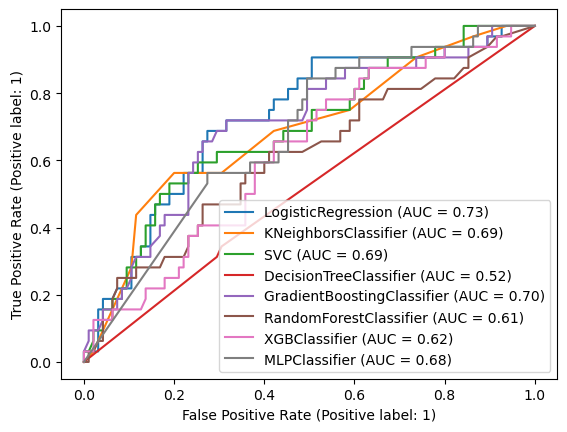

In [135]:
disp=plot_roc_curve(LR,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_);
plot_roc_curve(sv,x_test,y_test,ax=disp.ax_);
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_);
plot_roc_curve(gb,x_test,y_test,ax=disp.ax_);
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_);
plot_roc_curve(xg,x_test,y_test,ax=disp.ax_);
plot_roc_curve(mlp,x_test,y_test,ax=disp.ax_);

In [136]:
# hyper parameter tuning for decision tree
from sklearn.model_selection import GridSearchCV
params={"criterion":("gini","entropy"),
       "splitter":("best","random"),
       "max_depth":(list(range(1,6))),
       "min_samples_split":[1,2,3,4,5,6],
       "min_samples_leaf":list(range(1,6))
       }

In [137]:
tree_clf=DecisionTreeClassifier(random_state=3)
tree_cv=GridSearchCV(tree_clf,params,scoring="f1",n_jobs=1,verbose=1,cv=3)
tree_cv.fit(x_sm,y_sm)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=3), n_jobs=1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'splitter': ('best', 'random')},
             scoring='f1', verbose=1)

In [138]:
best_params=tree_cv.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [146]:
dt1=DecisionTreeClassifier(criterion= 'gini',
 max_depth= 5,
 min_samples_leaf= 1,
 min_samples_split= 2,
 splitter= 'best')

In [147]:
dt1.fit(x_sm,y_sm)

DecisionTreeClassifier(max_depth=5)

In [148]:
y_pred_tune=dt1.predict(x_test)


In [149]:
acc_tune=accuracy_score(y_test,y_pred_tune)
acc_tune

0.6929133858267716

In [150]:
y_pred_tune_train=dt1.predict(x_sm)


In [151]:
acc_tune_train=accuracy_score(y_sm,y_pred_tune_train)
acc_tune_train

0.8261904761904761

In [152]:
print(acc_tune_train)
print(acc_tune)

0.8261904761904761
0.6929133858267716


In [153]:
# hyperparameter tuning in xgboost

In [154]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={"gamma":[0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5],
           "learning_rate":[0.01,0.03,0.06,0.1,0.15,1.1,1.2,2.3,4.5,5.6,6.7,7.8,8.9,9.0,0.1,1.2,2.3,3.4,4.5,5],
           "n_estimator":[50,55,60,65,70,75,80,85,90,67,67,65,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80],
           "reg_alpha":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5],
           "reg_lambda":[0.1,0.2,0.4,0.8,1.6,3.2,6.4,3,4,5,6,7,8,9,10,11,12,13,14,15]}

In [155]:
xgb=XGBClassifier(random_state=42)

In [156]:
rcv=RandomizedSearchCV(estimator=xgb,scoring="f1",param_distributions=param_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)

In [157]:
rcv.fit(x_sm,y_sm)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[18:11:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.



RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                                          0.15, 1.1, 1.2, 2.3,
                

In [158]:
best_params=rcv.best_params_
best_params

{'reg_lambda': 6.4,
 'reg_alpha': 0.4,
 'n_estimator': 80,
 'learning_rate': 1.2,
 'gamma': 1.1}

In [159]:
xgb2=XGBClassifier(reg_lambda=6.4,
 reg_alpha=0.4,
 n_estimator= 80,
 learning_rate= 1.2,
 gamma= 1.1)

In [160]:
xgb2.fit(x_sm,y_sm)
y_pred_tune1=xgb2.predict(x_test)

[18:11:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.



In [161]:
acc_tune1=accuracy_score(y_test,y_pred_tune1)
acc_tune1

0.7244094488188977

In [162]:
y_pred_tune1=xgb2.predict(x_sm)
acc_train1=accuracy_score(y_sm,y_pred_tune1)
acc_train1

0.8095238095238095

In [163]:
# hyperparameter tuning for random forest
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


In [164]:
rf_cv.fit(x_sm,y_sm)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [165]:
rf_best_params=rf_cv.best_params_
rf_best_params

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [166]:
rf2=RandomForestClassifier(n_estimators= 1400,
 min_samples_split= 2,
 min_samples_leaf=1,
 max_features='auto',
 max_depth= 100,
 bootstrap=True)

In [167]:
rf2.fit(x_sm,y_sm)
y_pred_tune2=rf2.predict(x_test)

In [168]:
acc_tune=accuracy_score(y_test,y_pred_tune2)
acc_tune

0.6929133858267716

In [169]:
y_pre=rf2.predict(x_sm)
acc_train=accuracy_score(y_sm,y_pre)
acc_train

0.969047619047619